In [1]:
#EP Problem Set 1, Problem 2

In [2]:
#STEPS: 
#step 1: create chebyshev fit. order will dictate number of points
#step 2: fit a REALLY high order, print out coefficients and residuals until error < 10**(-6)
#step 3: run np.polynomial.legendre.legfit
#step 4: plot residuals, answer questions

In [3]:
import numpy as np
import matplotlib.pyplot as mpl

DEBUG=False

In [4]:
def cheby_fit(fun, order, xrange):
    x_true = np.linspace(xrange[0], xrange[1], order+1)
    y = fun(x_true)
    
    #change of variables to get cheby to run from -1 to 1
    x = (x_true - 1/2*(xrange[1]+xrange[0]))/(1/2*(xrange[1]-xrange[0]))
#     print('x_true is ', x_true)
#     print('x is now ', x)
    
    T = np.zeros((order+1, order+1))
    T[:, 0] = 1
    T[:, 1] = x
    for ii in range(2, order+1): #generate the chebyshev polynomials
        T[:, ii]=2*x*T[:, ii-1] - T[:, ii-2]

    #general colution T(x)c = y. solve for coeffs c = Tinv y
    coeffs = np.linalg.inv(T)@y #be sure to use matrix multiplication
    
    return coeffs


#use to evaluate the model
def cheby_eval(coeffs, x_test):
    #change of variables to get cheby to run from -1 to 1
    x = (x_test - 1/2*(max(x_test)+min(x_test)))/(1/2*(max(x_test)-min(x_test)))
#     print('x_test was ', x_test)
#     print('x is now ', x)
    Tcheby = np.zeros((len(x), order+1))
    Tcheby[:, 0] = 1
    Tcheby[:, 1] = x
    for ii in range(2, order+1): #generate the chebyshev polynomials
        Tcheby[:, ii]=2*x*Tcheby[:, ii-1] - Tcheby[:, ii-2]
    return Tcheby@coeffs #Tc = y


#use to sanity check my own results
#this is JSievers function from the class
def js_cheb_fit(fun, ord): 
    x=np.linspace(0.5,1,ord+1)
    y=fun(x)
    mat=np.zeros([ord+1,ord+1])
    mat[:,0]=1
    mat[:,1]=x
    for i in range(1,ord):
        mat[:,i+1]=2*x*mat[:,i]-mat[:,i-1]
    coeffs=np.linalg.inv(mat)@y
    return coeffs

cheby coefficients:  [-4.56893636e-01  4.95054796e-01 -4.24693215e-02  4.85773399e-03
 -6.25082783e-04  8.57519901e-05 -1.19596868e-05  1.71792107e-06]

 cheby rms error:  3.480216338687763e-07
cheby max error:  2.2640151375874495e-07

 poly rms error:  3.4802163151245933e-07
poly max error:  2.264015162012356e-07


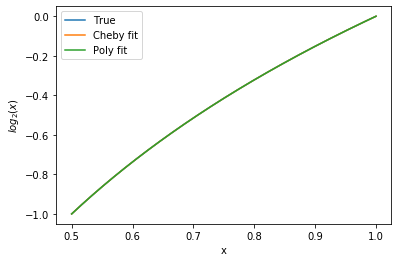

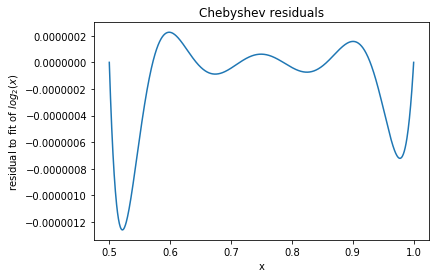

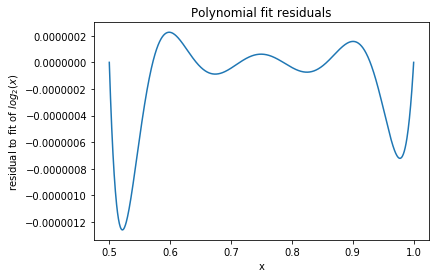

In [5]:
#call chebyshev fit
fun = np.log2
order=7 #at order=6 error is on the order of 10**(-6). use order=7 for 10**(-7) error.
xrange=[0.5,1]
coeffs=cheby_fit(fun, order, xrange)

if DEBUG: #check that my cheby fit returns the same as JSiever's from class
    coeffs_check = js_cheb_fit(fun, order)
    print('should be zeros ', coeffs-coeffs_check)

#evaluate chebyshev fit with test points
test_pts = 1000
x_test = np.linspace(xrange[0], xrange[1], test_pts)
y_test = cheby_eval(coeffs, x_test)
y_true = np.log2(x_test)
print('cheby coefficients: ', coeffs)

print('\n cheby rms error: ', np.std(y_test-y_true))
print('cheby max error: ', max(y_test-y_true))

#use alternate polynomial fit to fit function
x = np.linspace(xrange[0], xrange[1], order+1) #in fairness, same points as used by cheby
# polyfit = np.polynomial.legendre.legfit(x, np.log2(x), order) #this does terribly
polyfit = np.polyfit(x, np.log2(x), order) #use same order
y_poly = np.polyval(polyfit, x_test)

print('\n poly rms error: ', np.std(y_poly-y_true))
print('poly max error: ', max(y_poly-y_true))

mpl.figure()
mpl.plot(x_test, y_true)
mpl.plot(x_test, y_test)
mpl.plot(x_test, y_poly)
mpl.xlabel('x')
mpl.ylabel('$log_2(x)$')
mpl.legend(['True', 'Cheby fit', 'Poly fit'])
mpl.show()

mpl.figure()
mpl.plot(x_test, y_test-y_true)
mpl.xlabel('x')
mpl.ylabel('residual to fit of $log_2(x)$')
mpl.title('Chebyshev residuals')
mpl.show()

mpl.figure()
mpl.plot(x_test, y_poly-y_true)
mpl.xlabel('x')
mpl.ylabel('residual to fit of $log_2(x)$')
mpl.title('Polynomial fit residuals')
mpl.show()

The Chebyshev fit has slightly higher RMS error, and a slightly lower maximum error, than the polynomial fit using numpy polyfit. The errors are close though. This is what we'd expect, for the Chebyshev to have smaller maximum errors, sacrificing a little of the rms.
Seven terms are needed for the chebyshev fit residuals to be reduced to the order of 10^-7; six was at 10^-6.